<a href="https://colab.research.google.com/github/OscarIvaVP/categorias-crecimiento-producion/blob/main/Deteminar_intervalos_confianza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTAR LAS LIBRERIAS NECESARIAS**

In [1]:
# Importación de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import t
from scipy.stats import linregress
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importar los datos**

In [2]:
# Importar los datos
data = pd.read_excel("/content/drive/MyDrive/ENTREGABLES-FINALES-BANCO-MUNDIAL/CRECIMIENTO-LOGISTICO-CULTIVOS/datos-cuenca-tasa/datos-unidos-cuencas.xlsx")
data.head()

año        cuenca   hectareas cultivo
0  2001  Caño Cumaral   62.892257   arroz
1  2002  Caño Cumaral  851.767677   arroz
2  2003  Caño Cumaral  374.349735   arroz
3  2004  Caño Cumaral   61.953567   arroz
4  2005  Caño Cumaral  879.552913   arroz

**Determinamos tasa de crecimiento para cada cultivo en cada cuenca**

In [3]:
# Calculando la tasa de crecimiento para cada cultivo en cada cuenca
data['tasa-crecimiento'] = data.groupby(['cuenca', 'cultivo'])['hectareas'].pct_change() * 100

# Mostrando las primeras filas con la nueva columna "tasa-crecimiento"
data.head()


año        cuenca   hectareas cultivo  tasa-crecimiento
0  2001  Caño Cumaral   62.892257   arroz               NaN
1  2002  Caño Cumaral  851.767677   arroz       1254.328358
2  2003  Caño Cumaral  374.349735   arroz        -56.050253
3  2004  Caño Cumaral   61.953567   arroz        -83.450351
4  2005  Caño Cumaral  879.552913   arroz       1319.696970

**Generar un gráfico de dispersión con su intervalo de confianza para la tasa de crecimiento**

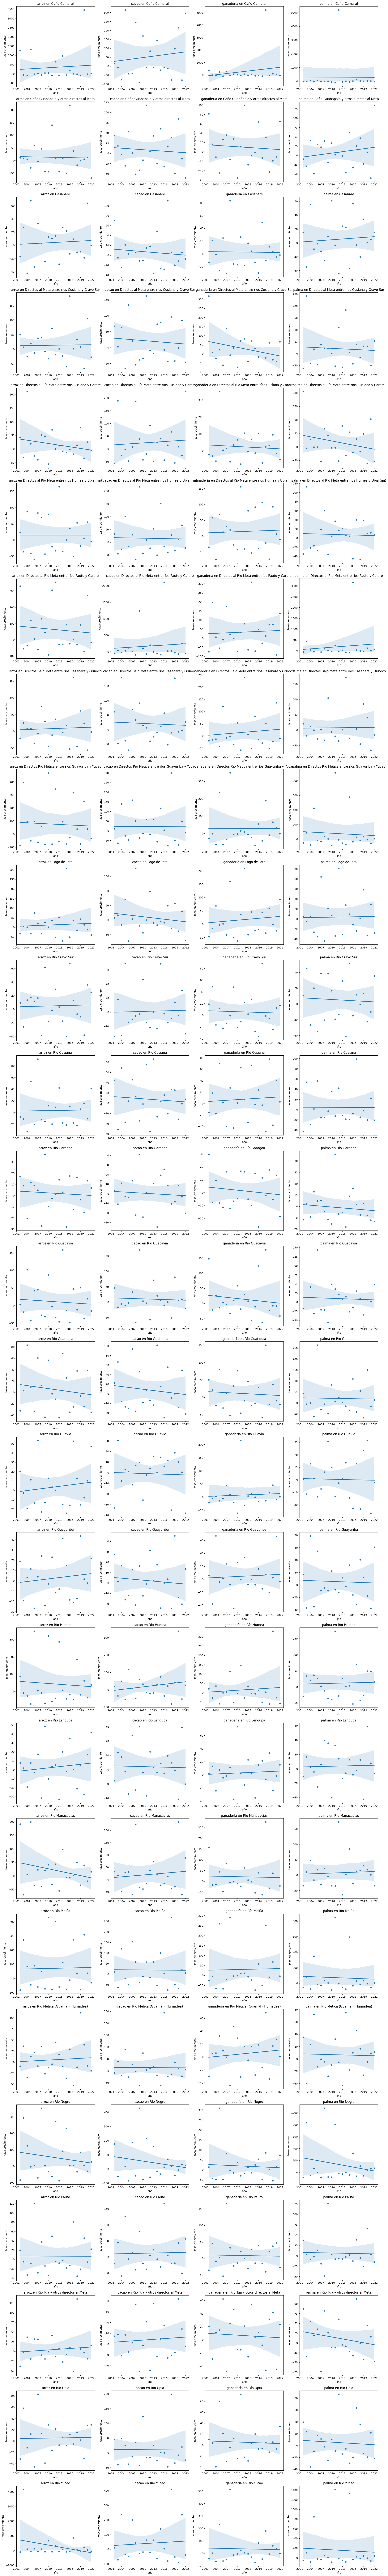

In [4]:
# Configuración de la figura
fig, axes = plt.subplots(27, 4, figsize=(20, 135))

# Lista de cultivos únicos
cultivos = data['cultivo'].unique()

# Iterando a través de las cuencas y cultivos para generar los subplots
for i, cuenca in enumerate(data['cuenca'].unique()):
    for j, cultivo in enumerate(cultivos):
        ax = axes[i, j]
        subset_data = data[(data['cuenca'] == cuenca) & (data['cultivo'] == cultivo)]
        sns.scatterplot(x='año', y='tasa-crecimiento', data=subset_data, ax=ax)
        sns.regplot(x='año', y='tasa-crecimiento', data=subset_data, scatter=False, ci=95, ax=ax)
        ax.set_title(f'{cultivo} en {cuenca}')
        ax.set_xticks(range(2001, 2023, 3))

plt.tight_layout()
plt.show()


**Determinamos intervalos de confianza para cada cultivo segun la cuenca**

In [5]:
# Lista para almacenar los intervalos de confianza
intervals = []

# Iterando a través de las cuencas y cultivos para calcular los intervalos de confianza
for cuenca in data['cuenca'].unique():
    for cultivo in data['cultivo'].unique():
        subset_data = data[(data['cuenca'] == cuenca) & (data['cultivo'] == cultivo)].dropna()
        slope, intercept, _, _, stderr = linregress(subset_data['año'], subset_data['tasa-crecimiento'])
        lower_bound = slope - 1.96 * stderr
        upper_bound = slope + 1.96 * stderr
        intervals.append((cuenca, cultivo, lower_bound, upper_bound))

# Creando un DataFrame con los intervalos de confianza
intervals_df = pd.DataFrame(intervals, columns=['cuenca', 'cultivo', 'lower_bound', 'upper_bound'])

# Mostrando los primeros registros
intervals_df.head()


cuenca    cultivo  lower_bound  \
0                             Caño Cumaral      arroz   -49.395965   
1                             Caño Cumaral      cacao    -6.556296   
2                             Caño Cumaral  ganadería   -47.670072   
3                             Caño Cumaral      palma   -81.011486   
4  Caño Guanápalo y otros directos al Meta      arroz    -5.035181   

   upper_bound  
0    72.042354  
1    11.857556  
2   114.602512  
3    83.478269  
4     4.461669

**Generamos un gráfico de Bandas de Confianza en Gráficos de Líneas - Muestra la tendencia**

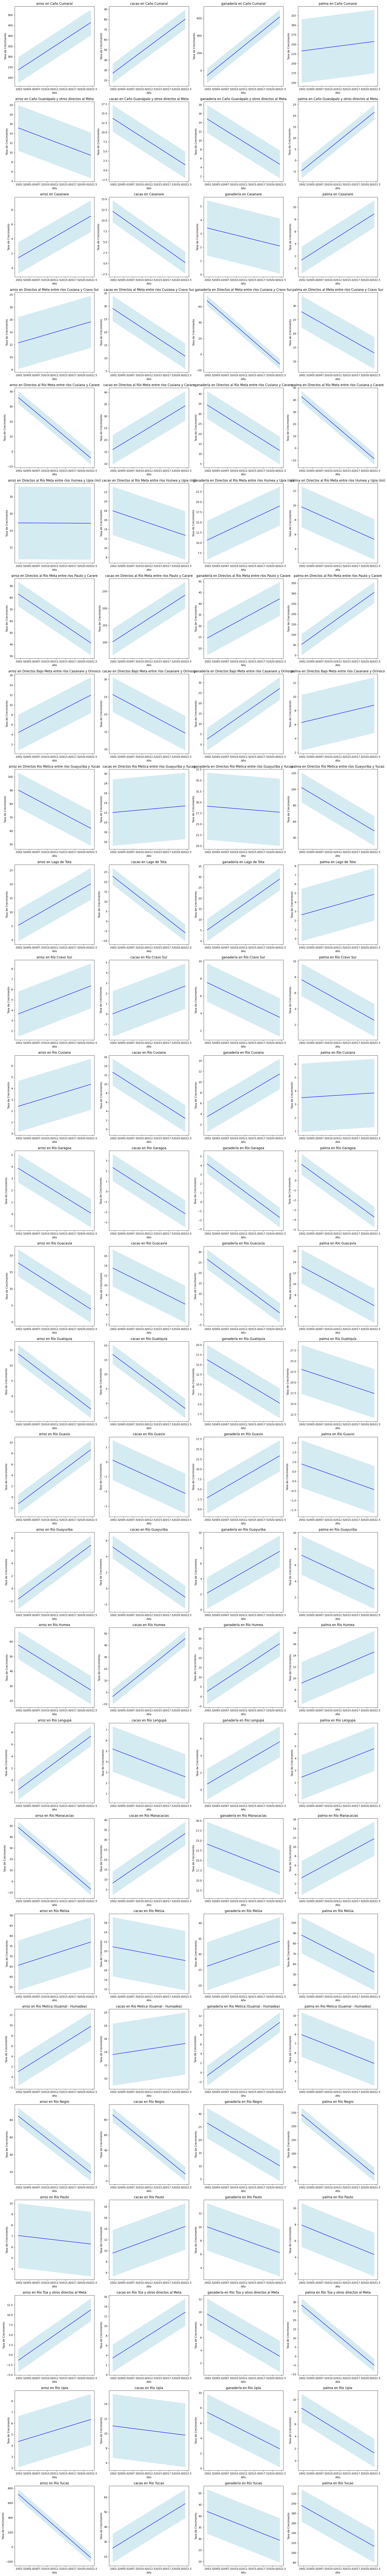

In [6]:
# Configuración de la figura
fig, axes = plt.subplots(27, 4, figsize=(20, 135))

# Iterando a través de las cuencas y cultivos para generar los subplots
for i, cuenca in enumerate(data['cuenca'].unique()):
    for j, cultivo in enumerate(data['cultivo'].unique()):
        ax = axes[i, j]
        subset_data = data[(data['cuenca'] == cuenca) & (data['cultivo'] == cultivo)].dropna()

        # Ajustando una regresión lineal
        slope, intercept, _, _, stderr = linregress(subset_data['año'], subset_data['tasa-crecimiento'])

        # Calculando las bandas de confianza
        x_values = np.linspace(subset_data['año'].min(), subset_data['año'].max(), 100)
        y_values = slope * x_values + intercept
        y_lower = y_values - 1.96 * stderr
        y_upper = y_values + 1.96 * stderr

        # Graficando la línea ajustada y las bandas de confianza
        ax.plot(x_values, y_values, color='blue')
        ax.fill_between(x_values, y_lower, y_upper, color='lightblue', alpha=0.5)
        ax.set_title(f'{cultivo} en {cuenca}')
        ax.set_xlabel('Año')
        ax.set_ylabel('Tasa de Crecimiento')

plt.tight_layout()
plt.show()


**Generamos un gráfico que muestra los intervalos de confianza para cada cultivo segun cuenca**

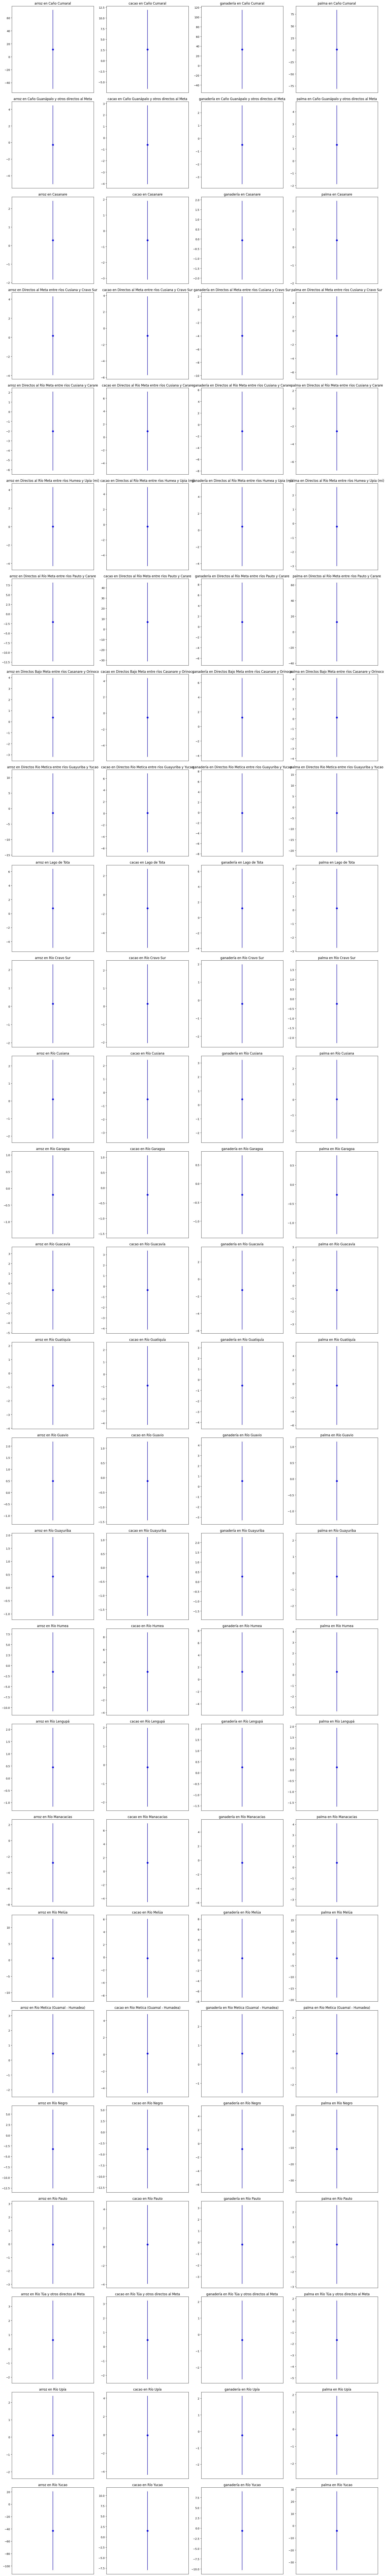

In [7]:
# Configuración de la figura
fig, axes = plt.subplots(27, 4, figsize=(20, 135))

# Iterando a través de las cuencas y cultivos para generar los subplots
for i, cuenca in enumerate(data['cuenca'].unique()):
    for j, cultivo in enumerate(data['cultivo'].unique()):
        ax = axes[i, j]
        subset_data = data[(data['cuenca'] == cuenca) & (data['cultivo'] == cultivo)].dropna()

        # Ajustando una regresión lineal
        slope, intercept, _, _, stderr = linregress(subset_data['año'], subset_data['tasa-crecimiento'])
        lower_bound = slope - 1.96 * stderr
        upper_bound = slope + 1.96 * stderr

        # Graficando el punto y las líneas de error
        ax.errorbar(x=0, y=slope, yerr=[[slope - lower_bound], [upper_bound - slope]], fmt='o', color='blue')
        ax.set_title(f'{cultivo} en {cuenca}')
        ax.set_xlim(-0.5, 0.5)
        ax.set_xticks([])

plt.tight_layout()
plt.show()


**Guardamos los datos en Excel**

In [8]:
# Ruta de salida para el archivo Excel
output_path = '/content/drive/MyDrive/ENTREGABLES-FINALES-BANCO-MUNDIAL/CRECIMIENTO-LOGISTICO-CULTIVOS/datos-cuenca-tasa/intervalos_confianza.xlsx'

# Exportando el DataFrame con los intervalos de confianza a Excel
intervals_df.to_excel(output_path, index=False)
